# U16 financial features analysis

## 拿取資料

<AxesSubplot:xlabel='date'>

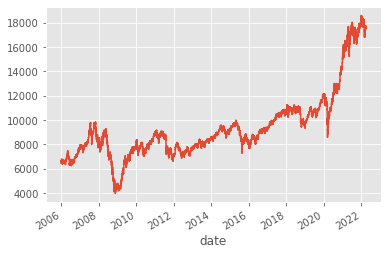

In [12]:
from finlab.data import Data
data = Data()

twii = data.get("發行量加權股價指數")
twii = twii['台股指數']
twii = twii[(twii.index.minute % 15 == 0)  & (twii.index.second == 0)]

import matplotlib.pyplot as plt
plt.style.use("ggplot")

twii.plot()

## 製作features

In [13]:
import talib
import numpy as np
import pandas as pd

sma = talib.SMA(twii, timeperiod=120)
wma = talib.WMA(twii, timeperiod=120)
mom = talib.MOM(twii, timeperiod=120)
k, d = talib.STOCH  (twii, twii, twii, fastk_period=120, slowk_period=60, slowd_period=60)
k2, d2 = talib.STOCH(twii, twii, twii, fastk_period=240, slowk_period=120, slowd_period=120)
k3, d3 = talib.STOCH(twii, twii, twii, fastk_period=360, slowk_period=180, slowd_period=180)
k4, d4 = talib.STOCH(twii, twii, twii, fastk_period=480, slowk_period=240, slowd_period=240)
k5, d5 = talib.STOCH(twii, twii, twii, fastk_period=640, slowk_period=320, slowd_period=320)
k6, d6 = talib.STOCH(twii, twii, twii, fastk_period=720, slowk_period=360, slowd_period=360)
k7, d7 = talib.STOCH(twii, twii, twii, fastk_period=840, slowk_period=420, slowd_period=420)
k8, d8 = talib.STOCH(twii, twii, twii, fastk_period=960, slowk_period=480, slowd_period=480)

rsi = talib.RSI (twii, timeperiod=120)
rsi2 = talib.RSI(twii, timeperiod=240)
rsi3 = talib.RSI(twii, timeperiod=480)
rsi4 = talib.RSI(twii, timeperiod=640)
rsi5 = talib.RSI(twii, timeperiod=720)
rsi6 = talib.RSI(twii, timeperiod=840)

macd1, macd2, macd3 = talib.MACD(twii, fastperiod=120, slowperiod=60, signalperiod=60)
willr = talib.WILLR(twii, twii, twii, timeperiod=120)
cci = talib.CCI(twii, twii, twii, timeperiod=120)

dataset = pd.DataFrame({
    'RSIb': rsi / 50,
    'RSIb2': rsi2 / 50,
    'RSIb3': rsi3 / 50,
    'RSIb4': rsi4 / 50,
    'RSIb5': rsi5 / 50,
    'RSIb6': rsi6 / 50,
    'KDb': k - d,
    'KDb2': k2 - d2,
    'KDb3': k3 - d3,
    'KDb4': k4 - d4,
    'KDb5': k5 - d5,
    'KDb6': k6 - d6,
    'KDb7': k7 - d7,
    'KDb8': k8 - d8,
    
    'a5':   (twii.rolling(5).mean()   / twii),
    'a10':  (twii.rolling(10).mean()  / twii),
    'a20':  (twii.rolling(20).mean()  / twii),
    'a40':  (twii.rolling(40).mean()  / twii),
    'a80':  (twii.rolling(80).mean()  / twii),
    'a160': (twii.rolling(160).mean() / twii),
    'a320': (twii.rolling(320).mean() / twii),
    'a640': (twii.rolling(640).mean() / twii),
    'a720': (twii.rolling(720).mean() / twii),
    'a840': (twii.rolling(840).mean() / twii),
    'a960': (twii.rolling(960).mean() / twii),
    'a1024':(twii.rolling(1024).mean() / twii),
    'b1': twii/twii.shift(50),
    'b2': twii/twii.shift(100),
    'b3': twii/twii.shift(150),
    'b4': twii/twii.shift(200),
    'b5': twii/twii.shift(250),
    'b6': twii/twii.shift(300),
    'b7': twii/twii.shift(350),
    'LINEARREG_SLOPE0': talib.LINEARREG_SLOPE(twii, 60),
    'LINEARREG_SLOPE1': talib.LINEARREG_SLOPE(twii, 120),

    'ADXR0': talib.ADXR(twii, twii, twii, 60),
    'ADXR1': talib.ADXR(twii, twii, twii, 120),
    'ADXR2': talib.ADXR(twii, twii, twii, 240),
    'ADXR3': talib.ADXR(twii, twii, twii, 360),
    'ADXR4': talib.ADXR(twii, twii, twii, 480),
    'ADXR5': talib.ADXR(twii, twii, twii, 640),

    'return': twii.shift(-10) > twii,
})

feature_names = list(dataset.columns[:-1])
feature_names

['RSIb',
 'RSIb2',
 'RSIb3',
 'RSIb4',
 'RSIb5',
 'RSIb6',
 'KDb',
 'KDb2',
 'KDb3',
 'KDb4',
 'KDb5',
 'KDb6',
 'KDb7',
 'KDb8',
 'a5',
 'a10',
 'a20',
 'a40',
 'a80',
 'a160',
 'a320',
 'a640',
 'a720',
 'a840',
 'a960',
 'a1024',
 'b1',
 'b2',
 'b3',
 'b4',
 'b5',
 'b6',
 'b7',
 'LINEARREG_SLOPE0',
 'LINEARREG_SLOPE1',
 'ADXR0',
 'ADXR1',
 'ADXR2',
 'ADXR3',
 'ADXR4',
 'ADXR5']

## 訓練

In [ ]:
import lightgbm

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [test],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

gs.fit(*train, **fit_params)

dataset_train = dataset[:'2015']
dataset_test = dataset['2016':]

train = dataset_train[feature_names], dataset_train['return']
test = dataset_test[feature_names], dataset_test['return']

gbm = lgb.LGBMClassifier(n_estimators=1000, random_state=5, learning_rate=0.05)
gbm.fit(*train)
gbm.score(*test)

## 測試哪些feature重要

<AxesSubplot:xlabel='Value', ylabel='Feature'>

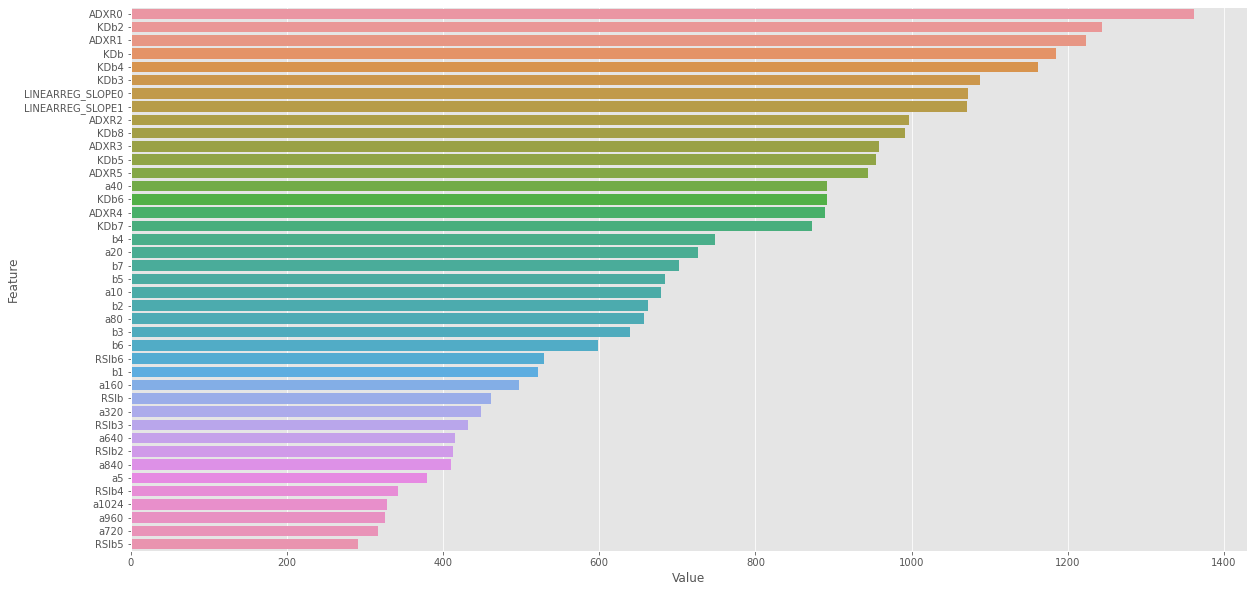

In [16]:
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importances_,feature_names)), columns=['Value','Feature'])
feature_imp

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))

## 回測一下

<AxesSubplot:xlabel='date'>

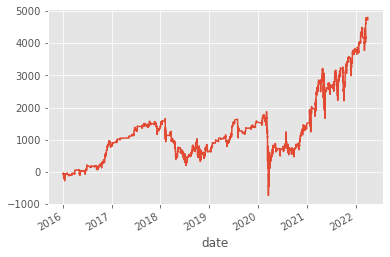

In [17]:
ey = gbm.predict_proba(dataset[feature_names])
ey = pd.Series(ey.swapaxes(0,1)[1], index=dataset.index)

eq = twii[dataset.index]
gain = ((eq.shift(-1) - eq))

signal = (ey > ey.quantile(0.7)).rolling(10).sum() > 0
eq = (gain[signal]['2016':]).cumsum()
eq.plot()

## 手續費+滑價

In [18]:
signal['2016'].astype(int).diff().abs().sum()

97.0

# U17 Model Interpretation

## Recall and Precision

<AxesSubplot:>

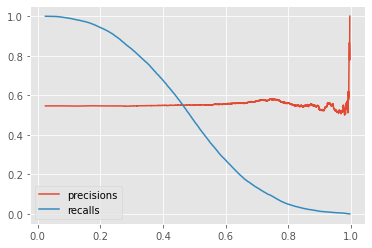

In [19]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(dataset['return']['2016':], ey['2016':])

pd.DataFrame({
    'precisions':precisions[:-1],
    'recalls':recalls[:-1],
}, index=thresholds).plot()


## ROC Curve

(14489,)
(14489,)
(14489,)


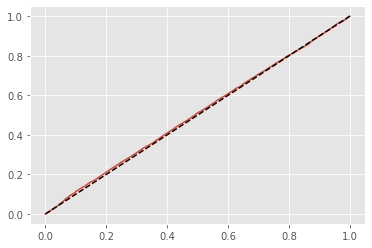

In [20]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(dataset['return']['2016':], ey['2016':])

print(fpr.shape)
print(tpr.shape)
print(thresholds.shape)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')

### 使用 eli5 察看機器學習如何做決定

In [ ]:
import sys
from sklearn.metrics import _scorer
sys.modules['sklearn.metrics.scorer'] = _scorer

from sklearn.feature_selection import _base
sys.modules['sklearn.feature_selection.base'] = _base

import eli5
eli5.explain_prediction_lightgbm(gbm, dataset[feature_names].iloc[10])

### 使用Skater來察看機器學習如何做實驗

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
# 新版的skater 不支援 dataset 中有 nan，必須先將有 nan 的 rows 移除喔！
dataset_train_dropna = dataset_train.dropna(how='any')


interpreter = Interpretation(training_data=dataset_train_dropna[feature_names].values[:1000],
                             feature_names=feature_names, training_labels=dataset_train_dropna['return'].values[:1000])
im_model = InMemoryModel(lambda x: gbm.predict_proba(x), examples=train[0],
                         target_names=['down', 'rise'])



In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)
plots = interpreter.feature_importance.plot_feature_importance(im_model, n_jobs=1)

#### 1. 挑幾項出來看

In [ ]:
r = interpreter.partial_dependence.plot_partial_dependence([('ADXR3', 'KDb2')], im_model, n_jobs=1, grid_resolution=10, 
                                                           grid_range=(0,1), n_samples=1000,
                                                           with_variance=False, figsize = (6, 4)) 

#### 分析為何判定會漲？

In [ ]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

exp = LimeTabularExplainer(dataset_test[feature_names].values, feature_names=feature_names)

doc_num = 0
exp.explain_instance(dataset_test[feature_names].iloc[doc_num], gbm.predict_proba).show_in_notebook()


In [ ]:
doc_num = 0
print('Actual Label:', dataset_test['return'].iloc[doc_num])
print('Predicted Label:', gbm.predict_proba(dataset_test[feature_names])[0])
exp.explain_instance(dataset_test[feature_names].iloc[doc_num], gbm.predict_proba).show_in_notebook()


### SHAP 分析package

In [ ]:
import shap
explainer = shap.TreeExplainer(gbm)
X = dataset_test[feature_names][::100]
shap_values = explainer.shap_values(X)
print('Expected Value:', explainer.expected_value)
pd.DataFrame(shap_values[1]).head()

In [ ]:
shap.initjs()

doc_id = 100

shap.force_plot(explainer.expected_value[1],
                shap_values[1], feature_names=feature_names)

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[1][0], feature_names=feature_names)


## 傳統策略研發

In [ ]:
def backtest(k1, k2, plot=False):
    
    k2, d2 = talib.STOCH(twii, twii, twii, fastk_period=k1, slowk_period=k2, slowd_period=k2/2)
    buy = k2 > d2
    sell = k2 < d2

    hold = pd.Series(np.nan, index=twii.index)
    hold[buy] = 1
    hold[sell] = -1
    hold.ffill(inplace=True)

    if (hold == 1).sum() == 0:
        return 1
    
    returns = twii.shift(-1) - twii
    
    if plot:
        
        returns[hold == 1][:'2015'].cumsum().plot()
    
    return returns[hold == 1][:'2015'].cumsum().iloc[-1]
   

maxr = 0
for k1 in range(40, 100, 1):
    for k2 in range(40, 100, 1):
        if k1 <= k2:
            continue
        r = backtest(k1, k2)
        if r > maxr:
            print(r, k1, k2)
            maxr = r

In [ ]:
backtest(88, 56, True)